<a href="https://colab.research.google.com/github/benji555-create/Data-Science/blob/main/BenjGaskU9Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv")
data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [11]:
data = data[['PTS', 'MP', 'FGA', '3PA', 'TRB', 'AST']]
data

,PTS,MP,FGA,3PA,TRB,AST
0,565,1624,469,97,487,97
1,1367,2416,1017,42,737,278
2,455,1641,433,211,216,83
3,654,1618,568,304,352,138
4,655,1921,538,335,167,204
...,...,...,...,...,...,...
567,137,439,108,7,103,57
568,1389,1942,1008,469,149,583
569,222,545,184,24,208,29
570,76,320,62,3,112,39


In [13]:
X = data[['MP', 'FGA', '3PA', 'TRB', 'AST']].values
y = data['PTS'].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [14]:
model = nn.Linear(X_train.shape[1], 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
losses = []
for epoch in range(300):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 489850.1250
Epoch 50, Loss: 45706.6914
Epoch 100, Loss: 16757.2402
Epoch 150, Loss: 12022.2842
Epoch 200, Loss: 10591.9824
Epoch 250, Loss: 9688.5342


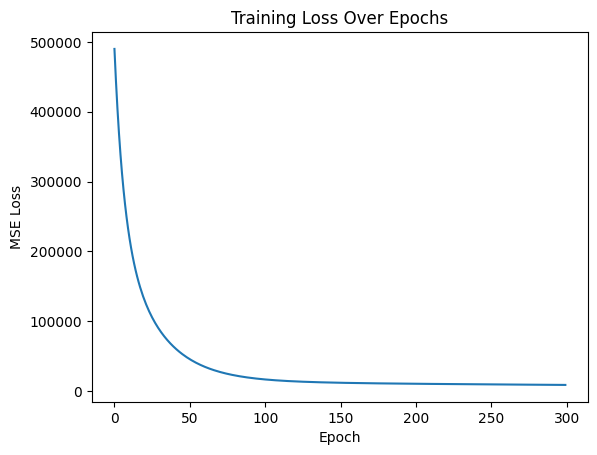

In [16]:
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

Because of the Training loss decresing, this means that its minimizing its loss as it uses more data, and its predictions versus real totals are much closer. This is good.

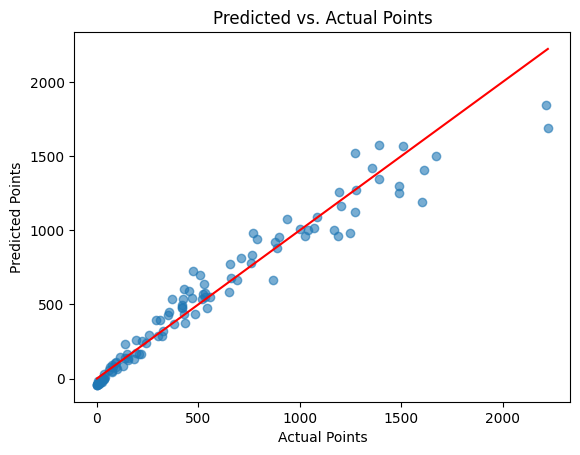

In [17]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)

plt.scatter(y_test.numpy(), predictions.numpy(), alpha=0.6)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Predicted vs. Actual Points")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

Players who play more minutes and take more shots are favored, regardless of how efficiently they score. As a result, the model becomes more reflective of high-usage players, rather than most effiecent scorers. This favors starters and star players, but misrepresents bench plug and play guys and role players. This also causes someone who took 10 shots to score 10 points and someone who took 5 to score 10 points to be represented at the same efficieny and vakue, even though taking the less shots is much better.